In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import scipy.io as sio

import scipy.stats as stats  # for getting gamma distribution pdf

#Rat_Peak20
#def read_data(filename)
#    mat_contents = sio.loadmat(filename)
#    return mat_contents

pi = np.pi

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def func2(x, a, b, c):
    return stats.gamma.pdf(x, a, scale = b) + c

def invGauss(x, mu, l, c):
    return (l/(2*pi*x**3))**0.5*np.exp((-l*(x-mu)**2)/(2*mu**2*x))+c


#ypeak = read_data('Rat_Peak20.mat')

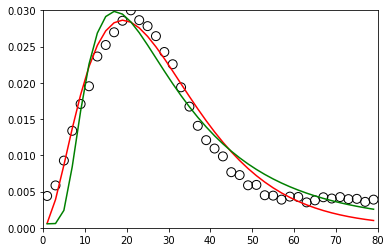

55326

In [192]:
mat_contents = sio.loadmat('Rat_Peak20.mat')
x = mat_contents['Rat_Peak20']
aux = x
x = np.array(np.squeeze(x[:,:,:,:]))

x = np.reshape(x,30*300*15*6)
ind = np.invert(np.isnan(x))
x = x[ind]

dt = 2
tmax = 80
n  = 80/dt+1;
rng = np.linspace(0,80,n)

c, edges = np.histogram(x,bins=rng)
c = c/c.sum()/dt

xdata = rng[0:-1]+dt/2
ydata = c;

plt.scatter(xdata, ydata, s=80, facecolors='none', edgecolors='k')
popt, pcov = curve_fit(func2, xdata, ydata, p0 = [3,10,0.004])#, bounds=(0, [1000, 1000, 1.]))
plt.plot(xdata, func2(xdata, *popt), 'r-', label='fit')
plt.axis([0,80,0,0.03])
poptGamma = popt

popt, pcov = curve_fit(invGauss, xdata, ydata, p0 = [31, 138, 0.004])
plt.plot(xdata, invGauss(xdata, *popt), 'g-', label='fit')
poptIG = popt

plt.show()
x.size

In [183]:

sum((func2(xdata, *poptGamma) - ydata)**2)

0.00013509210810379248

In [184]:
sum((invGauss(xdata, *poptIG) - ydata)**2)

0.00026271617325032226

In [193]:
x.shape



(55326,)